<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 1.0103609	total: 53.2ms	remaining: 53.1s


1:	learn: 0.9888580	total: 56.5ms	remaining: 28.2s
2:	learn: 0.9684363	total: 59.7ms	remaining: 19.8s
3:	learn: 0.9511133	total: 62.6ms	remaining: 15.6s
4:	learn: 0.9311199	total: 65ms	remaining: 12.9s
5:	learn: 0.9159794	total: 67.7ms	remaining: 11.2s
6:	learn: 0.9001119	total: 70.3ms	remaining: 9.97s
7:	learn: 0.8809454	total: 72.2ms	remaining: 8.95s
8:	learn: 0.8641526	total: 74.8ms	remaining: 8.24s
9:	learn: 0.8464170	total: 77.2ms	remaining: 7.65s
10:	learn: 0.8319397	total: 79ms	remaining: 7.1s
11:	learn: 0.8164432	total: 81.4ms	remaining: 6.7s
12:	learn: 0.7997261	total: 83.9ms	remaining: 6.37s
13:	learn: 0.7838529	total: 86.2ms	remaining: 6.07s
14:	learn: 0.7711035	total: 88.7ms	remaining: 5.83s
15:	learn: 0.7569989	total: 90.7ms	remaining: 5.58s
16:	learn: 0.7433780	total: 92.3ms	remaining: 5.34s
17:	learn: 0.7301051	total: 94ms	remaining: 5.13s
18:	learn: 0.7169639	total: 96.2ms	remaining: 4.96s
19:	learn: 0.7043438	total: 97.8ms	remaining: 4.79s
20:	learn: 0.6944360	total: 9

55:	learn: 0.4321887	total: 178ms	remaining: 3s
56:	learn: 0.4279246	total: 181ms	remaining: 2.99s
57:	learn: 0.4239052	total: 182ms	remaining: 2.96s
58:	learn: 0.4197030	total: 184ms	remaining: 2.94s
59:	learn: 0.4150040	total: 187ms	remaining: 2.93s
60:	learn: 0.4096785	total: 189ms	remaining: 2.91s
61:	learn: 0.4051877	total: 192ms	remaining: 2.9s
62:	learn: 0.4019013	total: 195ms	remaining: 2.89s
63:	learn: 0.3974772	total: 197ms	remaining: 2.88s
64:	learn: 0.3937447	total: 200ms	remaining: 2.87s
65:	learn: 0.3897356	total: 203ms	remaining: 2.87s
66:	learn: 0.3859691	total: 205ms	remaining: 2.86s
67:	learn: 0.3819496	total: 208ms	remaining: 2.85s
68:	learn: 0.3785088	total: 210ms	remaining: 2.84s
69:	learn: 0.3762522	total: 213ms	remaining: 2.83s
70:	learn: 0.3720241	total: 215ms	remaining: 2.81s


71:	learn: 0.3683210	total: 219ms	remaining: 2.82s
72:	learn: 0.3654167	total: 222ms	remaining: 2.81s
73:	learn: 0.3622999	total: 225ms	remaining: 2.81s
74:	learn: 0.3592484	total: 227ms	remaining: 2.8s
75:	learn: 0.3562460	total: 230ms	remaining: 2.79s
76:	learn: 0.3528619	total: 232ms	remaining: 2.78s
77:	learn: 0.3509205	total: 234ms	remaining: 2.77s
78:	learn: 0.3487623	total: 237ms	remaining: 2.76s
79:	learn: 0.3467846	total: 239ms	remaining: 2.75s
80:	learn: 0.3443744	total: 242ms	remaining: 2.74s
81:	learn: 0.3413944	total: 244ms	remaining: 2.73s
82:	learn: 0.3394152	total: 247ms	remaining: 2.72s
83:	learn: 0.3371704	total: 249ms	remaining: 2.72s
84:	learn: 0.3344829	total: 252ms	remaining: 2.71s
85:	learn: 0.3322738	total: 256ms	remaining: 2.72s
86:	learn: 0.3301297	total: 259ms	remaining: 2.72s
87:	learn: 0.3283627	total: 262ms	remaining: 2.71s
88:	learn: 0.3261664	total: 265ms	remaining: 2.71s
89:	learn: 0.3242552	total: 267ms	remaining: 2.7s
90:	learn: 0.3220744	total: 270ms

111:	learn: 0.2911862	total: 333ms	remaining: 2.64s
112:	learn: 0.2895545	total: 336ms	remaining: 2.64s
113:	learn: 0.2885614	total: 338ms	remaining: 2.63s
114:	learn: 0.2873901	total: 342ms	remaining: 2.63s
115:	learn: 0.2863435	total: 346ms	remaining: 2.63s
116:	learn: 0.2850690	total: 351ms	remaining: 2.65s
117:	learn: 0.2834334	total: 362ms	remaining: 2.71s
118:	learn: 0.2826308	total: 365ms	remaining: 2.7s
119:	learn: 0.2817054	total: 367ms	remaining: 2.69s
120:	learn: 0.2804332	total: 370ms	remaining: 2.69s
121:	learn: 0.2794950	total: 372ms	remaining: 2.68s
122:	learn: 0.2782714	total: 375ms	remaining: 2.67s
123:	learn: 0.2769923	total: 377ms	remaining: 2.66s
124:	learn: 0.2758216	total: 379ms	remaining: 2.65s
125:	learn: 0.2745744	total: 382ms	remaining: 2.65s
126:	learn: 0.2732819	total: 384ms	remaining: 2.64s


127:	learn: 0.2723598	total: 394ms	remaining: 2.69s
128:	learn: 0.2710913	total: 399ms	remaining: 2.7s
129:	learn: 0.2698885	total: 403ms	remaining: 2.69s
130:	learn: 0.2688640	total: 406ms	remaining: 2.69s
131:	learn: 0.2681478	total: 408ms	remaining: 2.68s
132:	learn: 0.2672413	total: 411ms	remaining: 2.68s
133:	learn: 0.2662575	total: 413ms	remaining: 2.67s
134:	learn: 0.2652584	total: 416ms	remaining: 2.66s
135:	learn: 0.2643168	total: 418ms	remaining: 2.66s
136:	learn: 0.2633091	total: 421ms	remaining: 2.65s
137:	learn: 0.2622694	total: 423ms	remaining: 2.64s
138:	learn: 0.2611895	total: 425ms	remaining: 2.63s
139:	learn: 0.2601013	total: 429ms	remaining: 2.64s
140:	learn: 0.2594171	total: 433ms	remaining: 2.64s
141:	learn: 0.2581013	total: 438ms	remaining: 2.64s
142:	learn: 0.2572661	total: 440ms	remaining: 2.64s
143:	learn: 0.2564178	total: 443ms	remaining: 2.63s
144:	learn: 0.2550550	total: 446ms	remaining: 2.63s
145:	learn: 0.2542704	total: 449ms	remaining: 2.63s
146:	learn: 0

172:	learn: 0.2339696	total: 512ms	remaining: 2.45s
173:	learn: 0.2334406	total: 515ms	remaining: 2.44s
174:	learn: 0.2328408	total: 518ms	remaining: 2.44s
175:	learn: 0.2323923	total: 520ms	remaining: 2.44s
176:	learn: 0.2313372	total: 523ms	remaining: 2.43s
177:	learn: 0.2308850	total: 526ms	remaining: 2.43s
178:	learn: 0.2305341	total: 529ms	remaining: 2.42s
179:	learn: 0.2301723	total: 531ms	remaining: 2.42s
180:	learn: 0.2293259	total: 534ms	remaining: 2.42s
181:	learn: 0.2290229	total: 535ms	remaining: 2.4s
182:	learn: 0.2282383	total: 538ms	remaining: 2.4s
183:	learn: 0.2276922	total: 541ms	remaining: 2.4s
184:	learn: 0.2270324	total: 555ms	remaining: 2.44s
185:	learn: 0.2263176	total: 560ms	remaining: 2.45s
186:	learn: 0.2256583	total: 563ms	remaining: 2.44s
187:	learn: 0.2253063	total: 565ms	remaining: 2.44s
188:	learn: 0.2246896	total: 567ms	remaining: 2.43s


189:	learn: 0.2241034	total: 574ms	remaining: 2.45s
190:	learn: 0.2235958	total: 577ms	remaining: 2.44s
191:	learn: 0.2227775	total: 580ms	remaining: 2.44s
192:	learn: 0.2221822	total: 582ms	remaining: 2.44s
193:	learn: 0.2214736	total: 585ms	remaining: 2.43s
194:	learn: 0.2210522	total: 588ms	remaining: 2.42s
195:	learn: 0.2202757	total: 590ms	remaining: 2.42s
196:	learn: 0.2199144	total: 592ms	remaining: 2.41s
197:	learn: 0.2193977	total: 595ms	remaining: 2.41s
198:	learn: 0.2190960	total: 597ms	remaining: 2.4s
199:	learn: 0.2186472	total: 600ms	remaining: 2.4s
200:	learn: 0.2181804	total: 603ms	remaining: 2.4s
201:	learn: 0.2173578	total: 605ms	remaining: 2.39s
202:	learn: 0.2165697	total: 607ms	remaining: 2.38s
203:	learn: 0.2159212	total: 610ms	remaining: 2.38s
204:	learn: 0.2153699	total: 613ms	remaining: 2.38s
205:	learn: 0.2148073	total: 650ms	remaining: 2.5s
206:	learn: 0.2143503	total: 653ms	remaining: 2.5s


207:	learn: 0.2140127	total: 675ms	remaining: 2.57s


208:	learn: 0.2135763	total: 678ms	remaining: 2.56s
209:	learn: 0.2130937	total: 680ms	remaining: 2.56s
210:	learn: 0.2127012	total: 683ms	remaining: 2.55s
211:	learn: 0.2122461	total: 686ms	remaining: 2.55s
212:	learn: 0.2114758	total: 688ms	remaining: 2.54s
213:	learn: 0.2107572	total: 691ms	remaining: 2.54s
214:	learn: 0.2099472	total: 693ms	remaining: 2.53s
215:	learn: 0.2093164	total: 697ms	remaining: 2.53s
216:	learn: 0.2088801	total: 702ms	remaining: 2.53s
217:	learn: 0.2084812	total: 711ms	remaining: 2.55s
218:	learn: 0.2081270	total: 720ms	remaining: 2.57s
219:	learn: 0.2073725	total: 725ms	remaining: 2.57s
220:	learn: 0.2066831	total: 730ms	remaining: 2.57s
221:	learn: 0.2063520	total: 733ms	remaining: 2.57s
222:	learn: 0.2057156	total: 735ms	remaining: 2.56s
223:	learn: 0.2051328	total: 746ms	remaining: 2.58s
224:	learn: 0.2044459	total: 749ms	remaining: 2.58s
225:	learn: 0.2039837	total: 751ms	remaining: 2.57s
226:	learn: 0.2032988	total: 754ms	remaining: 2.57s
227:	learn: 

242:	learn: 0.1953593	total: 798ms	remaining: 2.49s
243:	learn: 0.1946421	total: 801ms	remaining: 2.48s
244:	learn: 0.1939298	total: 804ms	remaining: 2.48s
245:	learn: 0.1931956	total: 810ms	remaining: 2.48s
246:	learn: 0.1927754	total: 813ms	remaining: 2.48s
247:	learn: 0.1923367	total: 817ms	remaining: 2.48s
248:	learn: 0.1917059	total: 819ms	remaining: 2.47s
249:	learn: 0.1913573	total: 822ms	remaining: 2.46s
250:	learn: 0.1908765	total: 824ms	remaining: 2.46s
251:	learn: 0.1905397	total: 827ms	remaining: 2.45s
252:	learn: 0.1902764	total: 829ms	remaining: 2.45s


253:	learn: 0.1898592	total: 831ms	remaining: 2.44s
254:	learn: 0.1893846	total: 834ms	remaining: 2.44s
255:	learn: 0.1890912	total: 837ms	remaining: 2.43s
256:	learn: 0.1888034	total: 840ms	remaining: 2.43s
257:	learn: 0.1883228	total: 862ms	remaining: 2.48s
258:	learn: 0.1877580	total: 865ms	remaining: 2.47s
259:	learn: 0.1875661	total: 867ms	remaining: 2.47s
260:	learn: 0.1868254	total: 870ms	remaining: 2.46s
261:	learn: 0.1862227	total: 873ms	remaining: 2.46s
262:	learn: 0.1857982	total: 875ms	remaining: 2.45s
263:	learn: 0.1853680	total: 878ms	remaining: 2.45s
264:	learn: 0.1851740	total: 880ms	remaining: 2.44s
265:	learn: 0.1849161	total: 891ms	remaining: 2.46s
266:	learn: 0.1845333	total: 893ms	remaining: 2.45s
267:	learn: 0.1840921	total: 896ms	remaining: 2.45s
268:	learn: 0.1836853	total: 897ms	remaining: 2.44s
269:	learn: 0.1833126	total: 900ms	remaining: 2.43s
270:	learn: 0.1828228	total: 903ms	remaining: 2.43s
271:	learn: 0.1822461	total: 906ms	remaining: 2.42s
272:	learn: 

284:	learn: 0.1774495	total: 964ms	remaining: 2.42s
285:	learn: 0.1772753	total: 966ms	remaining: 2.41s
286:	learn: 0.1771162	total: 970ms	remaining: 2.41s
287:	learn: 0.1764522	total: 972ms	remaining: 2.4s
288:	learn: 0.1758876	total: 975ms	remaining: 2.4s
289:	learn: 0.1755818	total: 977ms	remaining: 2.39s
290:	learn: 0.1753529	total: 979ms	remaining: 2.39s
291:	learn: 0.1751330	total: 982ms	remaining: 2.38s


292:	learn: 0.1745985	total: 984ms	remaining: 2.37s
293:	learn: 0.1742169	total: 989ms	remaining: 2.37s
294:	learn: 0.1736854	total: 992ms	remaining: 2.37s
295:	learn: 0.1734979	total: 1.01s	remaining: 2.39s
296:	learn: 0.1732292	total: 1.01s	remaining: 2.39s
297:	learn: 0.1727209	total: 1.01s	remaining: 2.38s
298:	learn: 0.1725259	total: 1.01s	remaining: 2.37s
299:	learn: 0.1719939	total: 1.01s	remaining: 2.37s
300:	learn: 0.1716051	total: 1.02s	remaining: 2.36s
301:	learn: 0.1714100	total: 1.02s	remaining: 2.35s
302:	learn: 0.1711090	total: 1.02s	remaining: 2.35s
303:	learn: 0.1709742	total: 1.02s	remaining: 2.34s
304:	learn: 0.1705625	total: 1.02s	remaining: 2.33s
305:	learn: 0.1703875	total: 1.03s	remaining: 2.33s
306:	learn: 0.1701506	total: 1.03s	remaining: 2.32s
307:	learn: 0.1696458	total: 1.03s	remaining: 2.32s
308:	learn: 0.1691163	total: 1.04s	remaining: 2.32s
309:	learn: 0.1687516	total: 1.05s	remaining: 2.34s
310:	learn: 0.1683664	total: 1.05s	remaining: 2.34s
311:	learn: 

332:	learn: 0.1618264	total: 1.15s	remaining: 2.3s
333:	learn: 0.1617575	total: 1.15s	remaining: 2.3s
334:	learn: 0.1615772	total: 1.16s	remaining: 2.29s
335:	learn: 0.1611011	total: 1.16s	remaining: 2.29s


336:	learn: 0.1609329	total: 1.16s	remaining: 2.28s
337:	learn: 0.1605556	total: 1.17s	remaining: 2.29s
338:	learn: 0.1601418	total: 1.17s	remaining: 2.29s
339:	learn: 0.1597572	total: 1.18s	remaining: 2.28s
340:	learn: 0.1594893	total: 1.18s	remaining: 2.28s
341:	learn: 0.1592030	total: 1.18s	remaining: 2.27s
342:	learn: 0.1587299	total: 1.18s	remaining: 2.27s
343:	learn: 0.1583729	total: 1.19s	remaining: 2.26s
344:	learn: 0.1582323	total: 1.19s	remaining: 2.26s
345:	learn: 0.1581669	total: 1.19s	remaining: 2.25s
346:	learn: 0.1578636	total: 1.19s	remaining: 2.25s
347:	learn: 0.1575881	total: 1.2s	remaining: 2.24s
348:	learn: 0.1573473	total: 1.2s	remaining: 2.24s
349:	learn: 0.1570391	total: 1.22s	remaining: 2.27s
350:	learn: 0.1566506	total: 1.22s	remaining: 2.26s
351:	learn: 0.1563851	total: 1.23s	remaining: 2.26s
352:	learn: 0.1562018	total: 1.23s	remaining: 2.25s
353:	learn: 0.1558413	total: 1.23s	remaining: 2.25s
354:	learn: 0.1555518	total: 1.23s	remaining: 2.24s
355:	learn: 0.

370:	learn: 0.1512920	total: 1.32s	remaining: 2.24s
371:	learn: 0.1511042	total: 1.32s	remaining: 2.23s
372:	learn: 0.1508081	total: 1.32s	remaining: 2.23s


373:	learn: 0.1507093	total: 1.33s	remaining: 2.22s
374:	learn: 0.1506008	total: 1.33s	remaining: 2.22s
375:	learn: 0.1504053	total: 1.33s	remaining: 2.21s
376:	learn: 0.1499545	total: 1.34s	remaining: 2.21s
377:	learn: 0.1497218	total: 1.34s	remaining: 2.2s
378:	learn: 0.1492086	total: 1.34s	remaining: 2.2s
379:	learn: 0.1488477	total: 1.35s	remaining: 2.2s
380:	learn: 0.1486594	total: 1.35s	remaining: 2.19s
381:	learn: 0.1484977	total: 1.35s	remaining: 2.19s
382:	learn: 0.1484466	total: 1.35s	remaining: 2.18s
383:	learn: 0.1483500	total: 1.36s	remaining: 2.17s
384:	learn: 0.1482731	total: 1.36s	remaining: 2.17s
385:	learn: 0.1478799	total: 1.36s	remaining: 2.17s
386:	learn: 0.1475253	total: 1.36s	remaining: 2.16s
387:	learn: 0.1474423	total: 1.37s	remaining: 2.16s
388:	learn: 0.1471103	total: 1.37s	remaining: 2.15s
389:	learn: 0.1469325	total: 1.37s	remaining: 2.15s
390:	learn: 0.1466710	total: 1.37s	remaining: 2.14s
391:	learn: 0.1464313	total: 1.38s	remaining: 2.14s
392:	learn: 0.1

408:	learn: 0.1417736	total: 1.43s	remaining: 2.07s
409:	learn: 0.1416748	total: 1.44s	remaining: 2.07s
410:	learn: 0.1412766	total: 1.44s	remaining: 2.06s
411:	learn: 0.1409244	total: 1.44s	remaining: 2.06s
412:	learn: 0.1406433	total: 1.44s	remaining: 2.05s


413:	learn: 0.1402798	total: 1.45s	remaining: 2.05s
414:	learn: 0.1400915	total: 1.45s	remaining: 2.04s
415:	learn: 0.1396425	total: 1.45s	remaining: 2.04s
416:	learn: 0.1395499	total: 1.45s	remaining: 2.03s
417:	learn: 0.1392984	total: 1.46s	remaining: 2.03s
418:	learn: 0.1392437	total: 1.46s	remaining: 2.02s
419:	learn: 0.1392023	total: 1.46s	remaining: 2.02s
420:	learn: 0.1391605	total: 1.46s	remaining: 2.01s
421:	learn: 0.1391195	total: 1.47s	remaining: 2.01s
422:	learn: 0.1386830	total: 1.47s	remaining: 2s
423:	learn: 0.1386122	total: 1.47s	remaining: 2s
424:	learn: 0.1383172	total: 1.47s	remaining: 1.99s
425:	learn: 0.1382774	total: 1.48s	remaining: 1.99s
426:	learn: 0.1381562	total: 1.48s	remaining: 1.98s
427:	learn: 0.1379020	total: 1.48s	remaining: 1.98s
428:	learn: 0.1375270	total: 1.48s	remaining: 1.97s
429:	learn: 0.1369732	total: 1.49s	remaining: 1.97s
430:	learn: 0.1367032	total: 1.49s	remaining: 1.97s
431:	learn: 0.1366132	total: 1.49s	remaining: 1.96s
432:	learn: 0.1365

470:	learn: 0.1284894	total: 1.59s	remaining: 1.79s
471:	learn: 0.1284580	total: 1.6s	remaining: 1.79s
472:	learn: 0.1281470	total: 1.6s	remaining: 1.78s


473:	learn: 0.1281241	total: 1.6s	remaining: 1.78s
474:	learn: 0.1277508	total: 1.6s	remaining: 1.77s
475:	learn: 0.1276554	total: 1.61s	remaining: 1.77s
476:	learn: 0.1274483	total: 1.61s	remaining: 1.76s
477:	learn: 0.1271075	total: 1.61s	remaining: 1.76s
478:	learn: 0.1268959	total: 1.61s	remaining: 1.75s
479:	learn: 0.1266612	total: 1.61s	remaining: 1.75s
480:	learn: 0.1263908	total: 1.61s	remaining: 1.74s
481:	learn: 0.1260797	total: 1.62s	remaining: 1.74s
482:	learn: 0.1257338	total: 1.62s	remaining: 1.73s
483:	learn: 0.1255791	total: 1.62s	remaining: 1.73s
484:	learn: 0.1255580	total: 1.62s	remaining: 1.72s
485:	learn: 0.1253071	total: 1.63s	remaining: 1.72s
486:	learn: 0.1252740	total: 1.63s	remaining: 1.71s
487:	learn: 0.1251312	total: 1.63s	remaining: 1.71s
488:	learn: 0.1248817	total: 1.63s	remaining: 1.7s
489:	learn: 0.1248025	total: 1.63s	remaining: 1.7s
490:	learn: 0.1246618	total: 1.64s	remaining: 1.7s
491:	learn: 0.1246352	total: 1.64s	remaining: 1.69s
492:	learn: 0.124

540:	learn: 0.1143642	total: 1.75s	remaining: 1.49s


541:	learn: 0.1143476	total: 1.77s	remaining: 1.5s
542:	learn: 0.1140960	total: 1.77s	remaining: 1.49s
543:	learn: 0.1137616	total: 1.78s	remaining: 1.49s
544:	learn: 0.1136226	total: 1.78s	remaining: 1.49s
545:	learn: 0.1133291	total: 1.78s	remaining: 1.48s
546:	learn: 0.1130839	total: 1.79s	remaining: 1.48s
547:	learn: 0.1128741	total: 1.79s	remaining: 1.48s
548:	learn: 0.1128589	total: 1.79s	remaining: 1.47s
549:	learn: 0.1126007	total: 1.8s	remaining: 1.47s
550:	learn: 0.1123570	total: 1.8s	remaining: 1.47s
551:	learn: 0.1121551	total: 1.8s	remaining: 1.46s
552:	learn: 0.1118503	total: 1.8s	remaining: 1.46s
553:	learn: 0.1118331	total: 1.81s	remaining: 1.45s
554:	learn: 0.1115195	total: 1.81s	remaining: 1.45s
555:	learn: 0.1112915	total: 1.81s	remaining: 1.45s
556:	learn: 0.1112720	total: 1.82s	remaining: 1.45s
557:	learn: 0.1110875	total: 1.83s	remaining: 1.45s
558:	learn: 0.1108621	total: 1.83s	remaining: 1.44s
559:	learn: 0.1108146	total: 1.83s	remaining: 1.44s
560:	learn: 0.110

582:	learn: 0.1064191	total: 1.9s	remaining: 1.36s
583:	learn: 0.1062486	total: 1.91s	remaining: 1.36s
584:	learn: 0.1061360	total: 1.91s	remaining: 1.36s
585:	learn: 0.1059763	total: 1.92s	remaining: 1.35s
586:	learn: 0.1056307	total: 1.92s	remaining: 1.35s
587:	learn: 0.1054186	total: 1.92s	remaining: 1.35s
588:	learn: 0.1053915	total: 1.92s	remaining: 1.34s
589:	learn: 0.1050143	total: 1.93s	remaining: 1.34s
590:	learn: 0.1050023	total: 1.93s	remaining: 1.33s
591:	learn: 0.1047531	total: 1.93s	remaining: 1.33s
592:	learn: 0.1045621	total: 1.93s	remaining: 1.33s
593:	learn: 0.1043151	total: 1.94s	remaining: 1.32s
594:	learn: 0.1040311	total: 1.94s	remaining: 1.32s
595:	learn: 0.1037766	total: 1.94s	remaining: 1.31s
596:	learn: 0.1036187	total: 1.94s	remaining: 1.31s
597:	learn: 0.1035168	total: 1.95s	remaining: 1.31s
598:	learn: 0.1033909	total: 1.95s	remaining: 1.3s
599:	learn: 0.1031944	total: 1.95s	remaining: 1.3s
600:	learn: 0.1028738	total: 1.95s	remaining: 1.3s
601:	learn: 0.10

646:	learn: 0.0953126	total: 2.07s	remaining: 1.13s
647:	learn: 0.0952338	total: 2.07s	remaining: 1.13s
648:	learn: 0.0950031	total: 2.08s	remaining: 1.12s
649:	learn: 0.0948258	total: 2.08s	remaining: 1.12s
650:	learn: 0.0948152	total: 2.08s	remaining: 1.11s
651:	learn: 0.0946537	total: 2.1s	remaining: 1.12s
652:	learn: 0.0945073	total: 2.1s	remaining: 1.12s
653:	learn: 0.0942984	total: 2.11s	remaining: 1.11s
654:	learn: 0.0940624	total: 2.11s	remaining: 1.11s
655:	learn: 0.0938712	total: 2.11s	remaining: 1.11s
656:	learn: 0.0936851	total: 2.11s	remaining: 1.1s
657:	learn: 0.0935622	total: 2.12s	remaining: 1.1s
658:	learn: 0.0935260	total: 2.12s	remaining: 1.1s
659:	learn: 0.0934265	total: 2.12s	remaining: 1.09s
660:	learn: 0.0932075	total: 2.12s	remaining: 1.09s
661:	learn: 0.0930257	total: 2.13s	remaining: 1.09s
662:	learn: 0.0927991	total: 2.13s	remaining: 1.08s
663:	learn: 0.0926568	total: 2.13s	remaining: 1.08s
664:	learn: 0.0925670	total: 2.13s	remaining: 1.07s
665:	learn: 0.092

695:	learn: 0.0887476	total: 2.24s	remaining: 980ms
696:	learn: 0.0886250	total: 2.25s	remaining: 976ms
697:	learn: 0.0884870	total: 2.25s	remaining: 973ms
698:	learn: 0.0883509	total: 2.25s	remaining: 969ms
699:	learn: 0.0881531	total: 2.25s	remaining: 966ms
700:	learn: 0.0879992	total: 2.26s	remaining: 962ms
701:	learn: 0.0878113	total: 2.26s	remaining: 959ms
702:	learn: 0.0877165	total: 2.26s	remaining: 956ms
703:	learn: 0.0877005	total: 2.26s	remaining: 952ms
704:	learn: 0.0875948	total: 2.27s	remaining: 948ms
705:	learn: 0.0874872	total: 2.27s	remaining: 945ms
706:	learn: 0.0873862	total: 2.27s	remaining: 942ms
707:	learn: 0.0871713	total: 2.27s	remaining: 938ms
708:	learn: 0.0870044	total: 2.28s	remaining: 935ms
709:	learn: 0.0868893	total: 2.28s	remaining: 931ms
710:	learn: 0.0867339	total: 2.28s	remaining: 928ms
711:	learn: 0.0865841	total: 2.29s	remaining: 924ms
712:	learn: 0.0865251	total: 2.29s	remaining: 921ms
713:	learn: 0.0862687	total: 2.29s	remaining: 917ms
714:	learn: 

752:	learn: 0.0809600	total: 2.39s	remaining: 785ms
753:	learn: 0.0808482	total: 2.4s	remaining: 782ms
754:	learn: 0.0808020	total: 2.4s	remaining: 780ms
755:	learn: 0.0806456	total: 2.41s	remaining: 777ms
756:	learn: 0.0805114	total: 2.41s	remaining: 773ms
757:	learn: 0.0803838	total: 2.41s	remaining: 770ms
758:	learn: 0.0803015	total: 2.41s	remaining: 767ms
759:	learn: 0.0801367	total: 2.42s	remaining: 763ms
760:	learn: 0.0800884	total: 2.42s	remaining: 760ms
761:	learn: 0.0799790	total: 2.42s	remaining: 756ms
762:	learn: 0.0798995	total: 2.42s	remaining: 753ms
763:	learn: 0.0797496	total: 2.43s	remaining: 750ms
764:	learn: 0.0797010	total: 2.43s	remaining: 746ms
765:	learn: 0.0795585	total: 2.43s	remaining: 743ms
766:	learn: 0.0793946	total: 2.43s	remaining: 739ms
767:	learn: 0.0792274	total: 2.44s	remaining: 736ms
768:	learn: 0.0790926	total: 2.44s	remaining: 733ms
769:	learn: 0.0789814	total: 2.44s	remaining: 729ms
770:	learn: 0.0788217	total: 2.44s	remaining: 726ms
771:	learn: 0.

800:	learn: 0.0751800	total: 2.54s	remaining: 630ms
801:	learn: 0.0750736	total: 2.54s	remaining: 627ms
802:	learn: 0.0749504	total: 2.54s	remaining: 624ms
803:	learn: 0.0748999	total: 2.54s	remaining: 620ms
804:	learn: 0.0748246	total: 2.55s	remaining: 617ms
805:	learn: 0.0746548	total: 2.55s	remaining: 614ms
806:	learn: 0.0745930	total: 2.55s	remaining: 610ms
807:	learn: 0.0745239	total: 2.55s	remaining: 607ms
808:	learn: 0.0744544	total: 2.56s	remaining: 604ms
809:	learn: 0.0743835	total: 2.56s	remaining: 602ms
810:	learn: 0.0743221	total: 2.57s	remaining: 599ms
811:	learn: 0.0741629	total: 2.58s	remaining: 596ms
812:	learn: 0.0740199	total: 2.58s	remaining: 593ms
813:	learn: 0.0739069	total: 2.58s	remaining: 590ms
814:	learn: 0.0737265	total: 2.58s	remaining: 586ms
815:	learn: 0.0735458	total: 2.58s	remaining: 583ms
816:	learn: 0.0734211	total: 2.59s	remaining: 580ms
817:	learn: 0.0733341	total: 2.59s	remaining: 577ms
818:	learn: 0.0732262	total: 2.59s	remaining: 573ms
819:	learn: 

853:	learn: 0.0686599	total: 2.71s	remaining: 464ms
854:	learn: 0.0685646	total: 2.71s	remaining: 460ms
855:	learn: 0.0684453	total: 2.72s	remaining: 457ms
856:	learn: 0.0683122	total: 2.72s	remaining: 454ms
857:	learn: 0.0681802	total: 2.72s	remaining: 450ms
858:	learn: 0.0680580	total: 2.72s	remaining: 447ms
859:	learn: 0.0679274	total: 2.73s	remaining: 444ms
860:	learn: 0.0678086	total: 2.73s	remaining: 441ms
861:	learn: 0.0677056	total: 2.73s	remaining: 437ms
862:	learn: 0.0675776	total: 2.73s	remaining: 434ms
863:	learn: 0.0674929	total: 2.74s	remaining: 431ms
864:	learn: 0.0673826	total: 2.74s	remaining: 428ms
865:	learn: 0.0672631	total: 2.74s	remaining: 424ms
866:	learn: 0.0671629	total: 2.76s	remaining: 423ms
867:	learn: 0.0671537	total: 2.76s	remaining: 420ms
868:	learn: 0.0670076	total: 2.77s	remaining: 417ms
869:	learn: 0.0668972	total: 2.77s	remaining: 414ms
870:	learn: 0.0668129	total: 2.77s	remaining: 410ms
871:	learn: 0.0667167	total: 2.77s	remaining: 407ms
872:	learn: 

901:	learn: 0.0636805	total: 2.88s	remaining: 312ms
902:	learn: 0.0635421	total: 2.88s	remaining: 309ms
903:	learn: 0.0634100	total: 2.88s	remaining: 306ms
904:	learn: 0.0633132	total: 2.88s	remaining: 303ms
905:	learn: 0.0631741	total: 2.89s	remaining: 299ms
906:	learn: 0.0631160	total: 2.89s	remaining: 296ms
907:	learn: 0.0630290	total: 2.89s	remaining: 293ms
908:	learn: 0.0629203	total: 2.89s	remaining: 290ms
909:	learn: 0.0628269	total: 2.9s	remaining: 286ms
910:	learn: 0.0627103	total: 2.9s	remaining: 283ms
911:	learn: 0.0626260	total: 2.9s	remaining: 280ms
912:	learn: 0.0624858	total: 2.9s	remaining: 277ms
913:	learn: 0.0624190	total: 2.91s	remaining: 273ms
914:	learn: 0.0623242	total: 2.91s	remaining: 270ms
915:	learn: 0.0622396	total: 2.91s	remaining: 267ms
916:	learn: 0.0621860	total: 2.91s	remaining: 264ms
917:	learn: 0.0621321	total: 2.92s	remaining: 261ms
918:	learn: 0.0620369	total: 2.92s	remaining: 257ms
919:	learn: 0.0619241	total: 2.92s	remaining: 254ms
920:	learn: 0.06

959:	learn: 0.0580768	total: 3.05s	remaining: 127ms
960:	learn: 0.0579829	total: 3.05s	remaining: 124ms
961:	learn: 0.0578879	total: 3.06s	remaining: 121ms
962:	learn: 0.0577946	total: 3.06s	remaining: 118ms
963:	learn: 0.0577172	total: 3.06s	remaining: 114ms
964:	learn: 0.0576256	total: 3.06s	remaining: 111ms
965:	learn: 0.0575465	total: 3.07s	remaining: 108ms
966:	learn: 0.0574581	total: 3.08s	remaining: 105ms
967:	learn: 0.0573777	total: 3.08s	remaining: 102ms
968:	learn: 0.0572668	total: 3.08s	remaining: 98.7ms
969:	learn: 0.0571958	total: 3.09s	remaining: 95.5ms
970:	learn: 0.0571229	total: 3.09s	remaining: 92.3ms
971:	learn: 0.0570856	total: 3.09s	remaining: 89.1ms
972:	learn: 0.0570310	total: 3.09s	remaining: 85.9ms
973:	learn: 0.0569094	total: 3.1s	remaining: 82.7ms
974:	learn: 0.0568378	total: 3.1s	remaining: 79.5ms
975:	learn: 0.0567517	total: 3.1s	remaining: 76.3ms
976:	learn: 0.0566564	total: 3.1s	remaining: 73.1ms
977:	learn: 0.0564954	total: 3.11s	remaining: 69.9ms
978:	l

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.1950626951997422
ABC Pre-generator MAE 0.1948766639915296


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

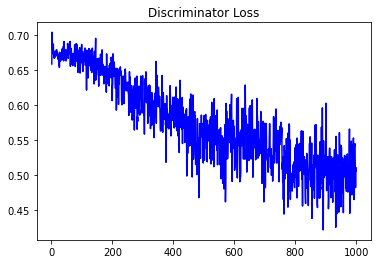

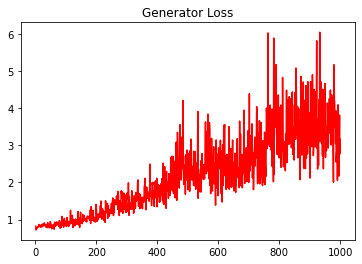

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.20963236410189054


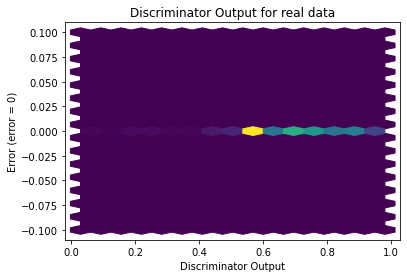

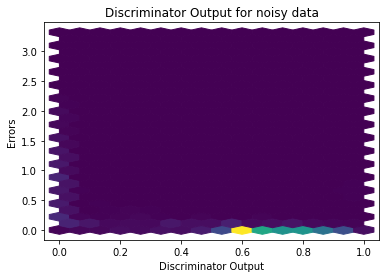

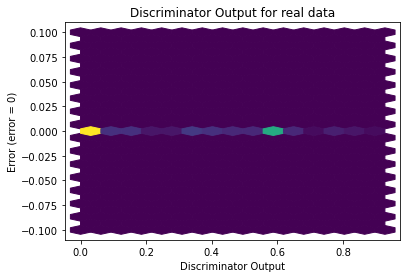

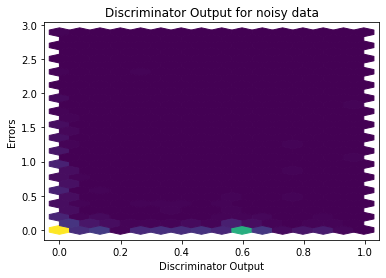

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())